# Telco Churn Analysis

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load the data
telco_base_data = pd.read_csv('Telco.csv')

In [ ]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco_base_data.shape

(7043, 21)

In [ ]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
# Checking the data types of all the columns
telco_base_data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# Check the descriptive statistics of numeric variables
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


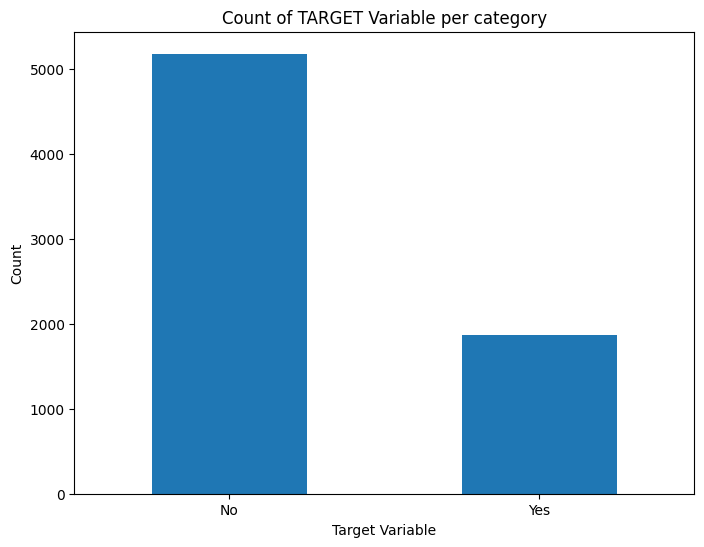

In [ ]:
telco_base_data['Churn'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.xlabel("Target Variable")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Count of TARGET Variable per category");

In [ ]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

,count
Churn,
No,73.463013
Yes,26.536987


In [ ]:
telco_base_data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


* Data is highly imbalanced, ratio = 73:27%<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [ ]:
# Concise Summary of the dataframe
telco_base_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Here we can see that TotalCharges have 0 null values


## Data Cleaning


In [ ]:
# Create a copy of base data for manupulation & processing
telco_data = telco_base_data.copy()

In [ ]:
# Convert TotalCharges from object to numeric data type
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


As we can see there are 11 missing values in TotalCharges column.

In [ ]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Handling Missing Value** <br>
Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [ ]:
 #Removing missing values
telco_data.dropna(how = 'any', inplace = True)

Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [ ]:
# Get the max tenure
print(telco_data['tenure'].max())

72


In [ ]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [ ]:
telco_data['tenure_group'].value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


**6.** Remove columns not required for processing

In [ ]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Exploratory Data Analysis
**1.** Plot distibution of individual predictors by churn

### Univariate Analysis

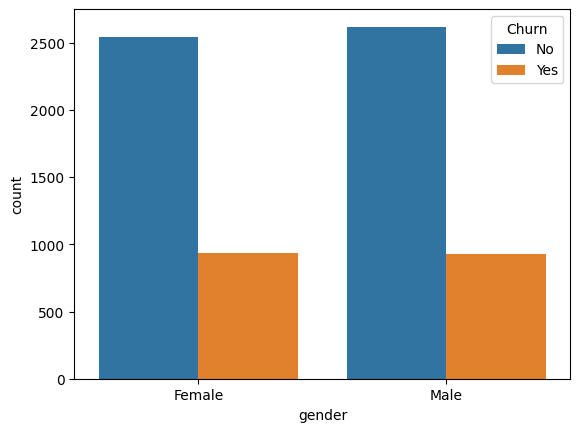

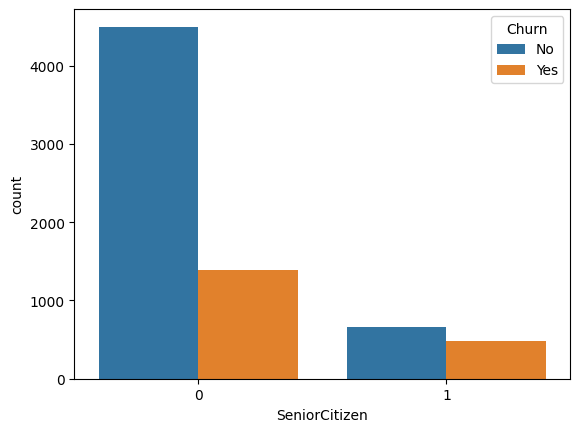

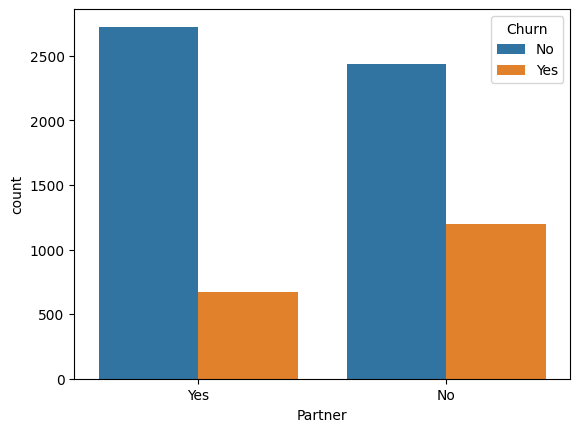

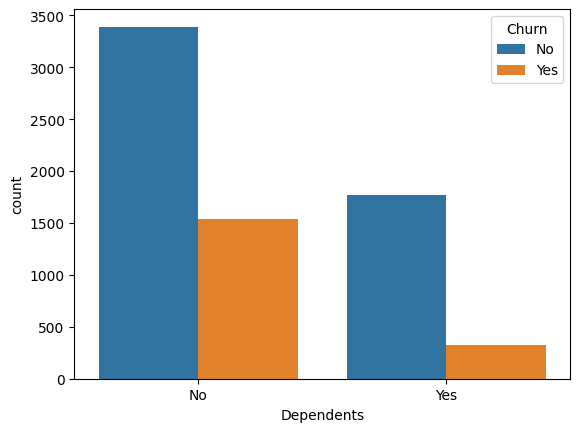

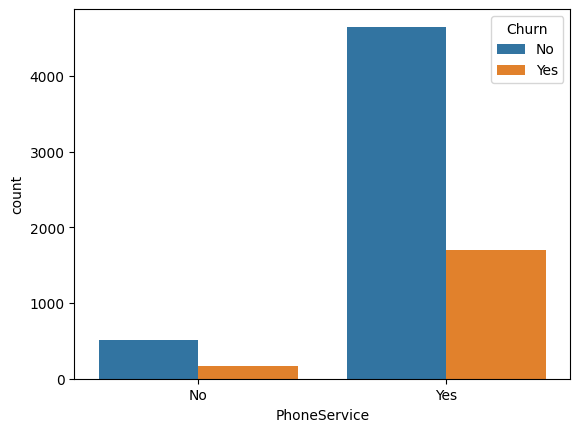

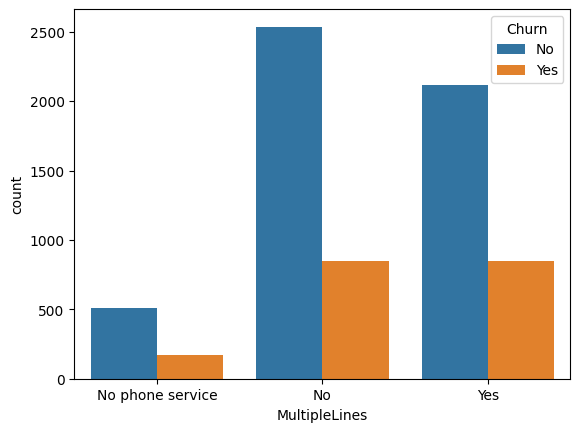

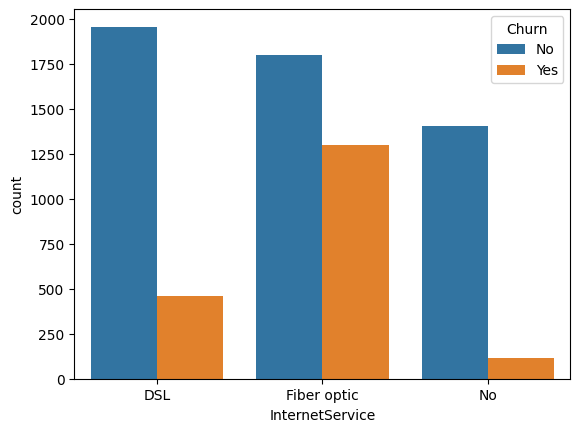

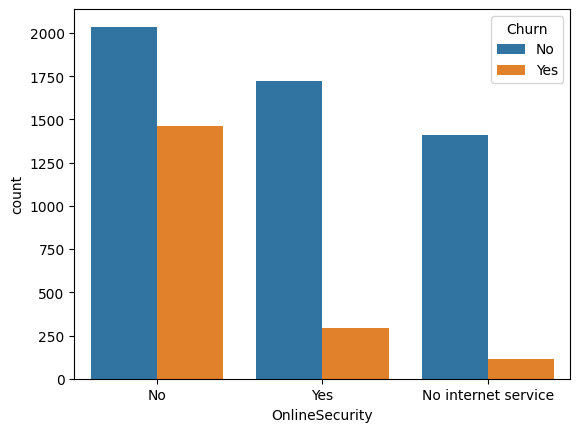

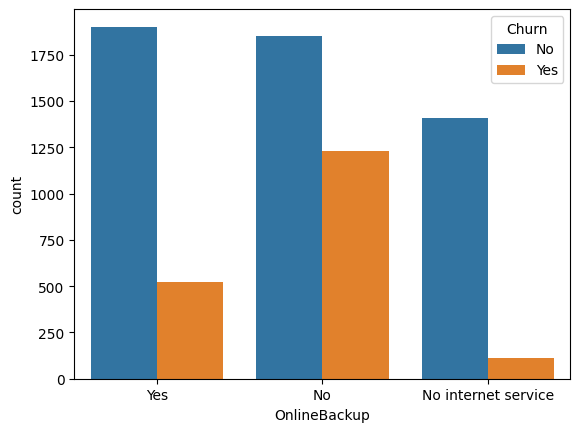

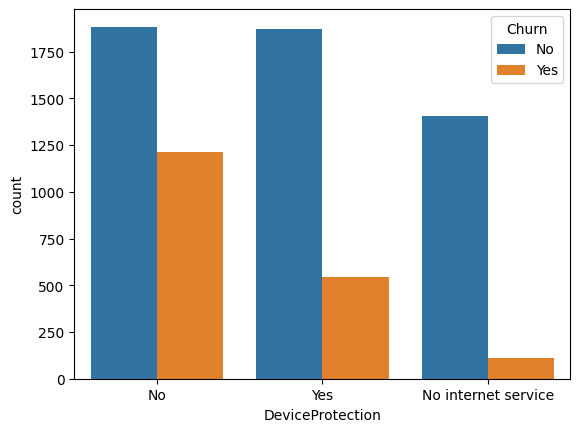

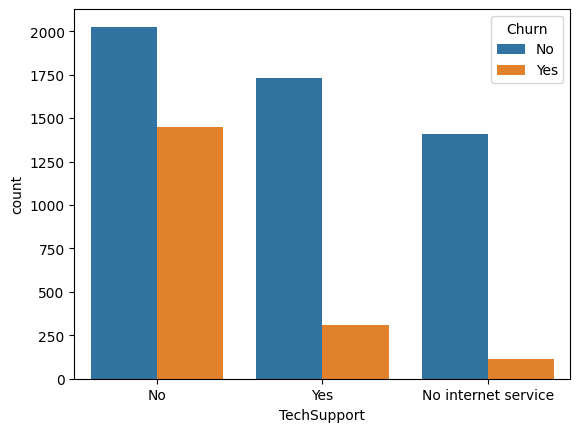

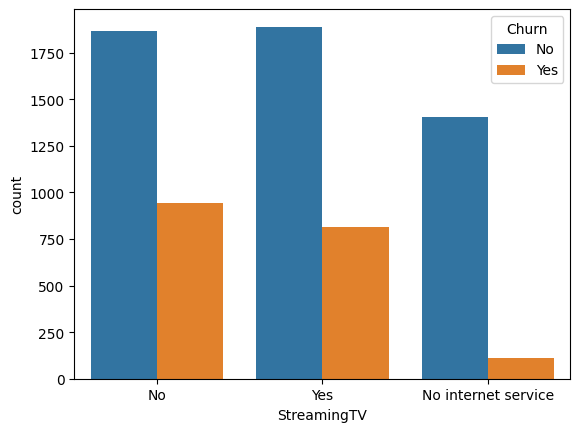

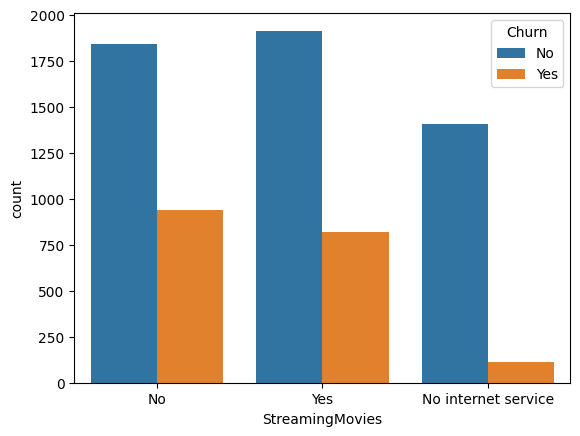

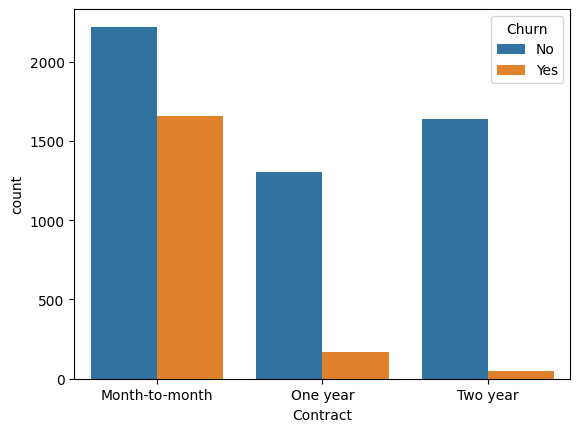

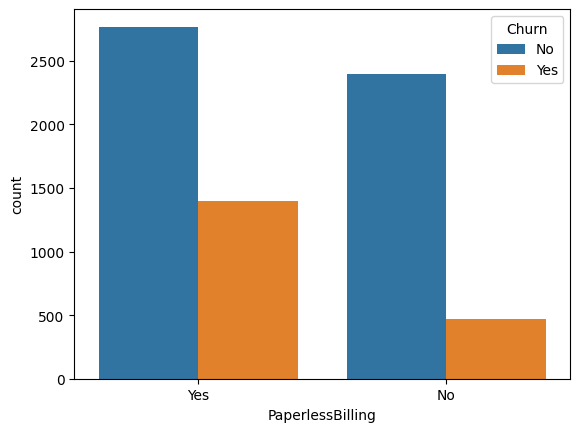

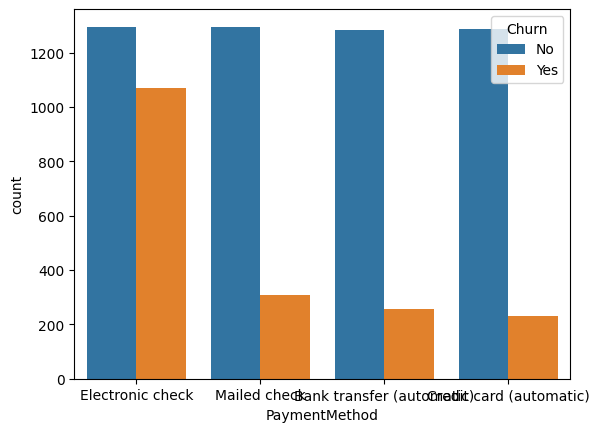

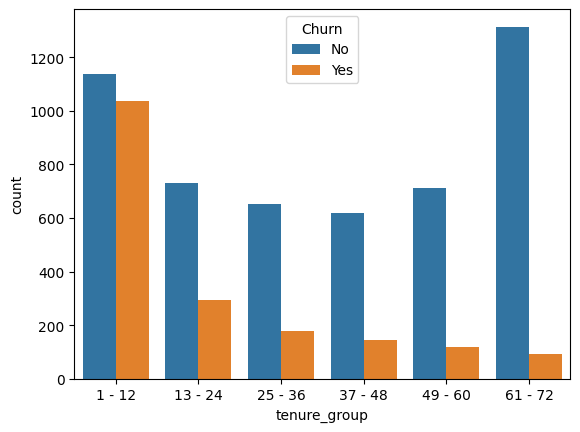

In [ ]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

**2.** Convert the target variable 'Churn'  in a binary numeric variable (Yes=1 , No = 0)

In [ ]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [ ]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**3.** Convert all the categorical variables into dummy variables

In [ ]:
telco_data_dummies = pd.get_dummies(telco_data, dtype=int)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


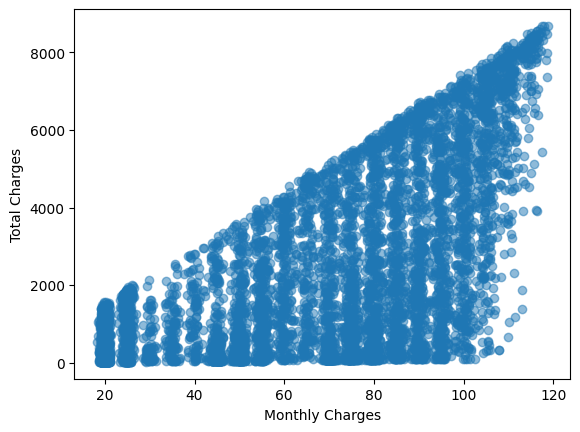

In [ ]:
# Relationship between Monthly Charges and Total Charges
plt.scatter(x=telco_data_dummies['MonthlyCharges'], y=telco_data_dummies['TotalCharges'], alpha=0.5)
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

Total Charges increase as Monthly Charges increase

<ipython-input-62-b434184c9f43>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0)],
<ipython-input-62-b434184c9f43>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1)],


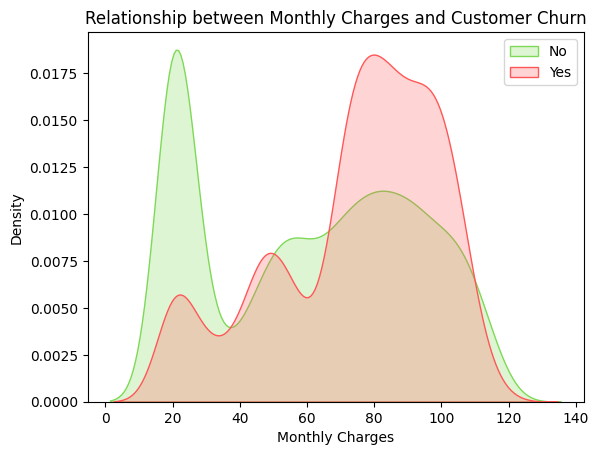

In [ ]:
#Relationship between Total charges and customer churn
sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0)],
            color="#7ed957", shade=True, label='No')
sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1)],
            color="#ff5757", shade=True, label='Yes')

# Set plot labels and title
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.title("Relationship between Monthly Charges and Customer Churn")

# Display the legend
plt.legend()

# Show the plot
plt.show()

**Insight:** Churn is high when Monthly Charges ar high

<ipython-input-63-f0b839ee48ec>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0)],
<ipython-input-63-f0b839ee48ec>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1)],


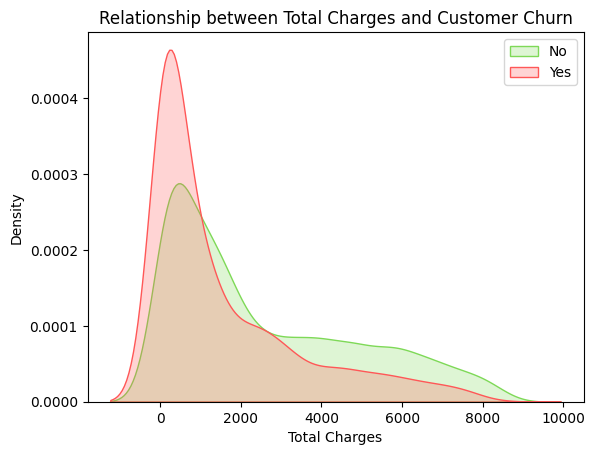

In [ ]:
#Relationship between Total charges and customer churn
sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0)],
            color="#7ed957", shade=True, label='No')
sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1)],
            color="#ff5757", shade=True, label='Yes')

# Set plot labels and title
plt.xlabel("Total Charges")
plt.ylabel("Density")
plt.title("Relationship between Total Charges and Customer Churn")

# Display the legend
plt.legend()

# Show the plot
plt.show()

Churn is higher at lower Total Charges

Hence, all these 3 factors mentioned above that are **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are responsible for **High Churn**.

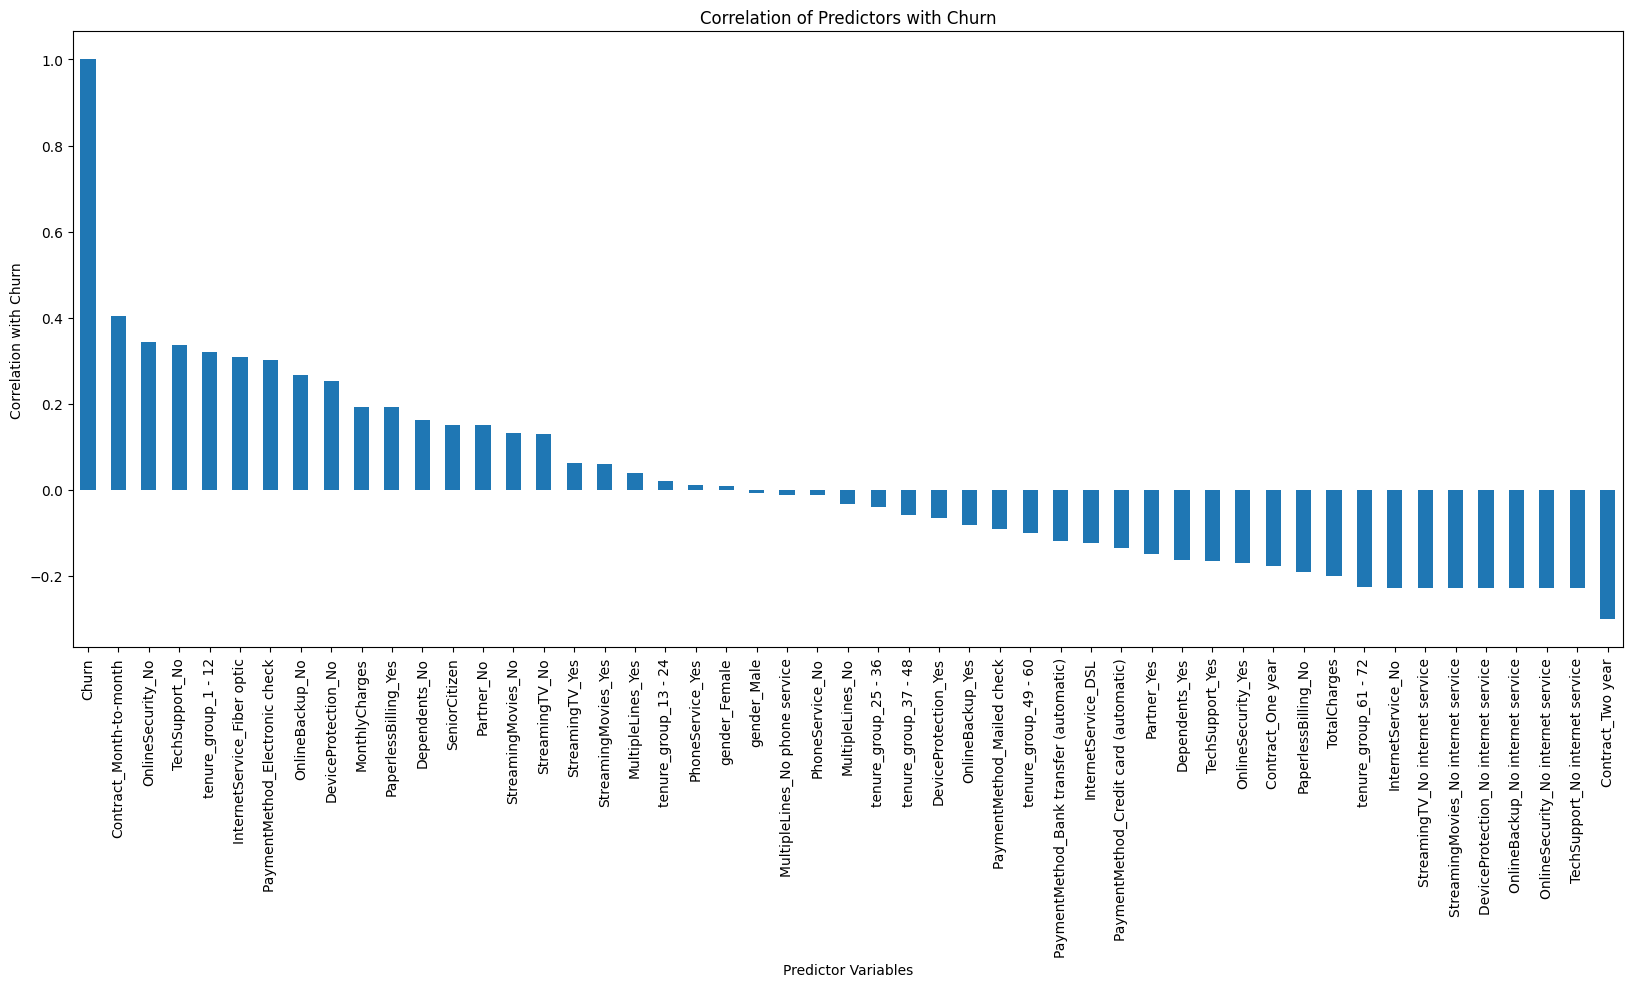

In [ ]:
# Build a corelation of all predictors with 'Churn'
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.xlabel("Predictor Variables")  # X-axis label
plt.ylabel("Correlation with Churn")  # Y-axis label
plt.title("Correlation of Predictors with Churn")  # Title

plt.show()

**Derived Insight:**

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seen in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **Multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

<Axes: >

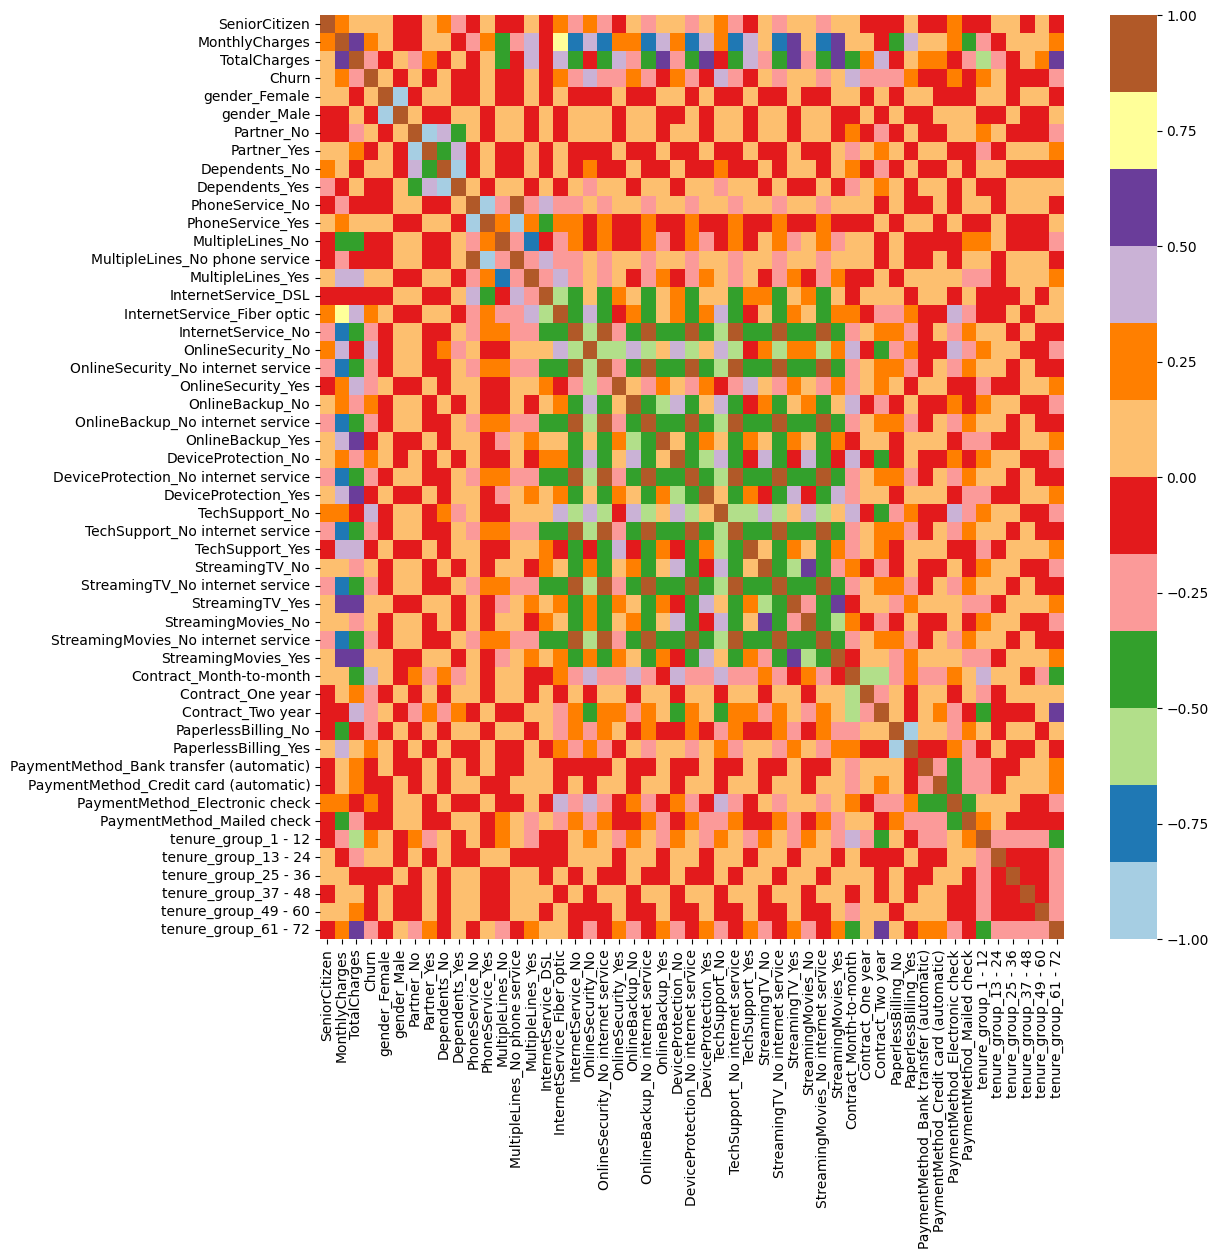

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

### Bivariate Analysis

In [ ]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    fig, ax = plt.subplots()

    # Calculate width considering hue
    width = len(df[col].unique()) + (len(df[hue].unique()) if hue else 0) * 0.4  + 2

    fig.set_size_inches(width, 8)

    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')

    plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels

    # Annotations for count values
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')

    plt.title(title)
    plt.show()

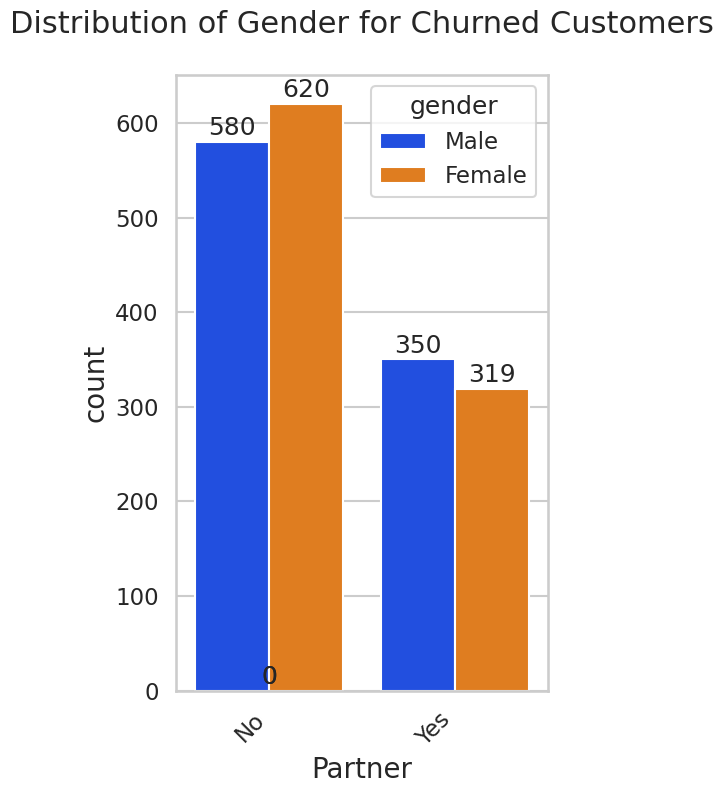

In [ ]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

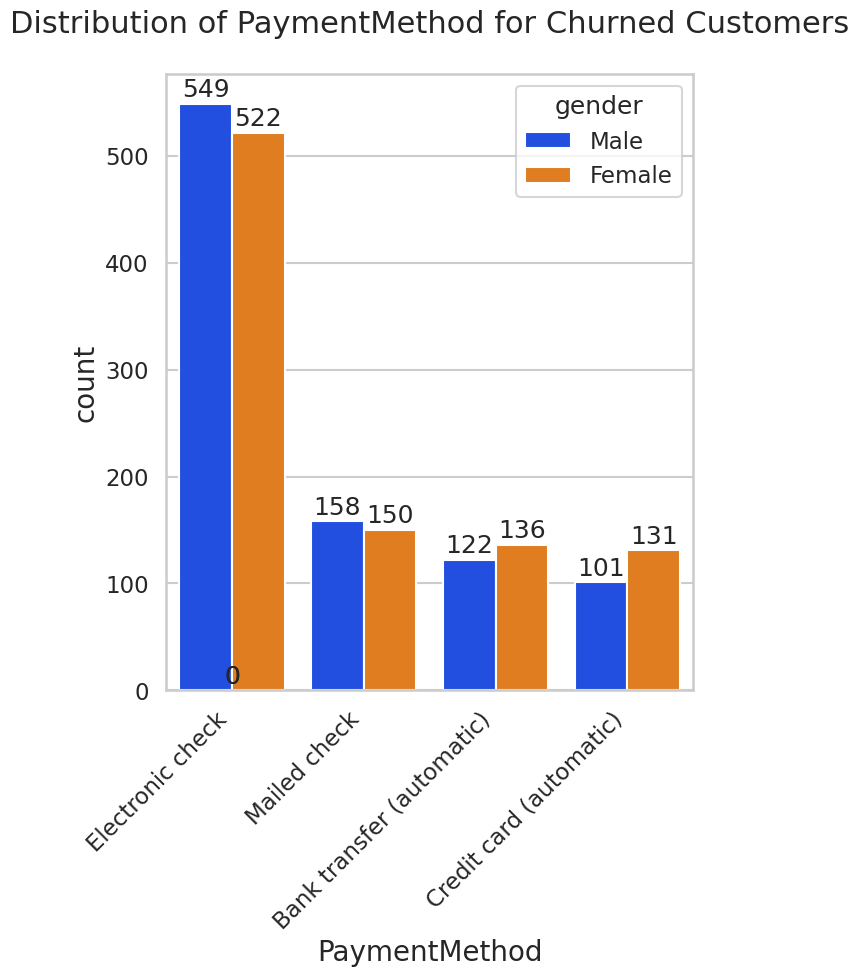

In [ ]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

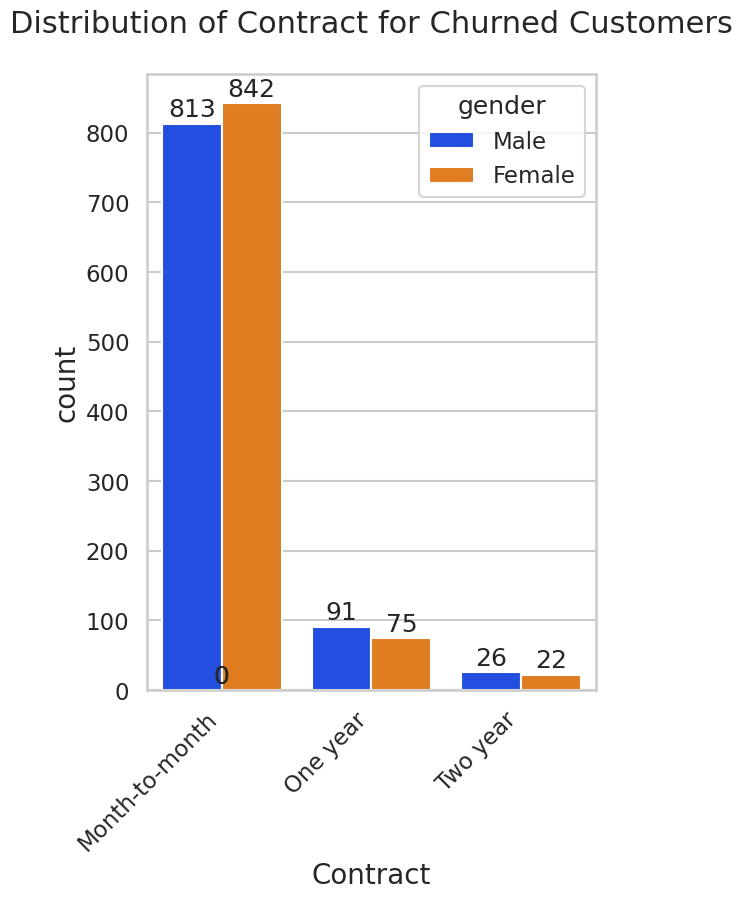

In [ ]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

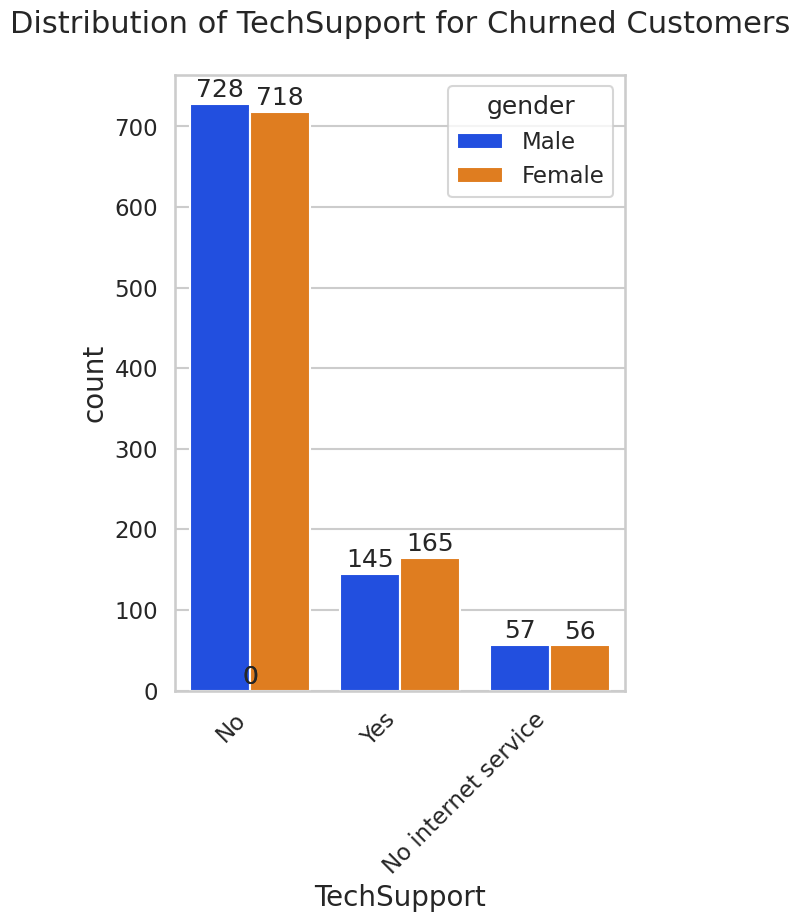

In [ ]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

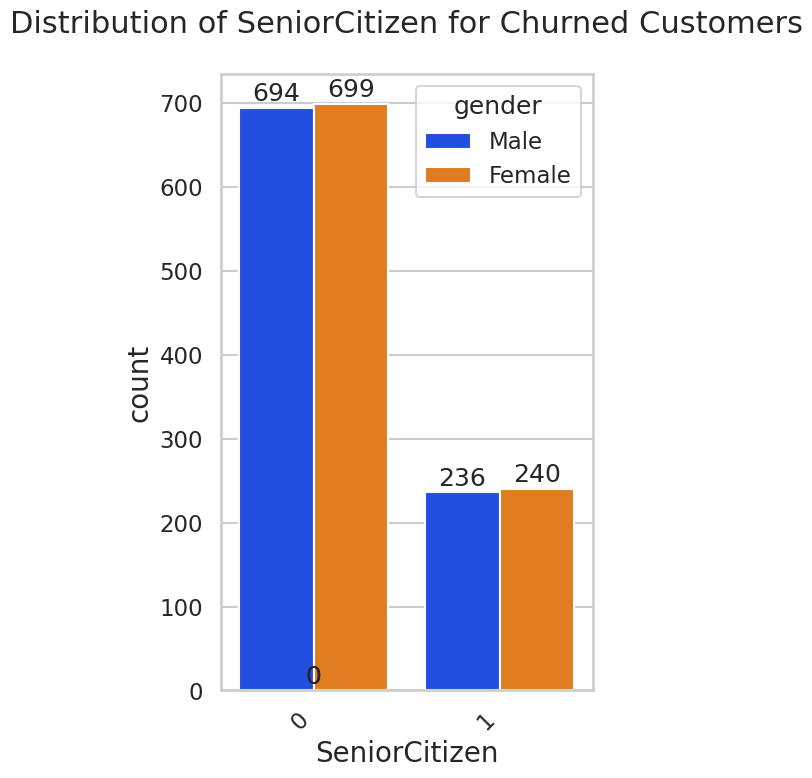

In [ ]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

In [ ]:
telco_data_dummies.to_csv('tel_churn.csv')

#Model Building

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
df=df.drop('Unnamed: 0',axis=1)
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
y=df['Churn']
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


Train Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

##Decision Tree Classifier

In [ ]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
model_dt.score(x_test,y_test)

0.798862828713575

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1052
           1       0.60      0.59      0.60       355

    accuracy                           0.80      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.80      0.80      0.80      1407



* As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
* Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
* Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [ ]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [ ]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9403630077787382
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       547
           1       0.95      0.93      0.94       610

    accuracy                           0.94      1157
   macro avg       0.94      0.94      0.94      1157
weighted avg       0.94      0.94      0.94      1157



In [ ]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[518  29]
 [ 40 570]]


Now we can see quite better results, i.e. Accuracy: 94 %, and a very good recall, precision & f1 score for minority class.

##Random Forest Classifier

In [ ]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred=model_rf.predict(x_test)

In [ ]:
model_rf.score(x_test,y_test)

0.8187633262260128

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1052
           1       0.68      0.53      0.60       355

    accuracy                           0.82      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.81      0.82      0.81      1407



### Performing SMOTEENN

In [ ]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [ ]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [ ]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [ ]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print(model_score_r1)

0.9412273120138289


In [ ]:
print(metrics.classification_report(yr_test1, yr_predict1))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       511
           1       0.93      0.97      0.95       646

    accuracy                           0.94      1157
   macro avg       0.94      0.94      0.94      1157
weighted avg       0.94      0.94      0.94      1157



In [ ]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[460  51]
 [ 17 629]]


###Performing PCA

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [ ]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
yr_predict_pca = model.predict(xr_test_pca)
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [ ]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7242869490060502
              precision    recall  f1-score   support

           0       0.72      0.62      0.66       511
           1       0.73      0.81      0.77       646

    accuracy                           0.72      1157
   macro avg       0.72      0.71      0.72      1157
weighted avg       0.72      0.72      0.72      1157



###Performing Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
        'n_estimators': [200],
        'max_depth': [10],
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model_rf_smote, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(xr_train1, yr_train1)

# Get the best parameters
best_params = grid_search.best_params_

In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(xr_test1)

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(yr_test1, y_pred))
print(classification_report(yr_test1, y_pred))
print(confusion_matrix(yr_test1, y_pred))

Accuracy: 0.9507346585998271
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       511
           1       0.94      0.97      0.96       646

    accuracy                           0.95      1157
   macro avg       0.95      0.95      0.95      1157
weighted avg       0.95      0.95      0.95      1157

[[474  37]
 [ 20 626]]


The Grid Search model might be the best, showing a high precision, recall, and F1-score with overall balance for your classification task.

## Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

In [ ]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(xr_train1, yr_train1)

LinearDiscriminantAnalysis()

In [ ]:
yr_predict_lda = lda_model.predict(xr_test1)

In [ ]:
print("LDA Model Evaluation:")
print("Accuracy:", lda_model.score(xr_test1, yr_test1))
print(classification_report(yr_test1, yr_predict_lda))

LDA Model Evaluation:
Accuracy: 0.9369057908383751
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       511
           1       0.95      0.93      0.94       646

    accuracy                           0.94      1157
   macro avg       0.94      0.94      0.94      1157
weighted avg       0.94      0.94      0.94      1157



In [ ]:
print(metrics.confusion_matrix(yr_test1, yr_predict_lda))

[[482  29]
 [ 44 602]]


## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=100)

# Fit the model to the training data
model_gb.fit(xr_train1, yr_train1)

# Predict on the test set
y_pred_gb = model_gb.predict(xr_test1)


In [ ]:
# Evaluate the model
print("Gradient Boosting Model Evaluation:")
print("Accuracy:", accuracy_score(yr_test1, y_pred_gb))
print(classification_report(yr_test1, y_pred_gb))
print(confusion_matrix(yr_test1, y_pred_gb))

Gradient Boosting Model Evaluation:
Accuracy: 0.9593777009507347
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       511
           1       0.96      0.96      0.96       646

    accuracy                           0.96      1157
   macro avg       0.96      0.96      0.96      1157
weighted avg       0.96      0.96      0.96      1157

[[487  24]
 [ 23 623]]


##ROC Curve

In [ ]:
# Get predicted probabilities for each model
y_prob_dt = model_dt_smote.predict_proba(xr_test)[:, 1]
y_prob_rf = model_rf_smote.predict_proba(xr_test1)[:, 1]
y_prob_pca = model.predict_proba(xr_test_pca)[:, 1]
y_prob_gsearch = best_model.predict_proba(xr_test1)[:, 1]
y_prob_lda = lda_model.predict_proba(xr_test1)[:, 1]
y_prob_gboost = model_gb.predict_proba(xr_test1)[:, 1]

In [ ]:
# Calculate ROC curve and AUC for each model
fpr_dt, tpr_dt, _ = roc_curve(yr_test, y_prob_dt)
auc_dt = roc_auc_score(yr_test, y_prob_dt)

fpr_rf, tpr_rf, _ = roc_curve(yr_test1, y_prob_rf)
auc_rf = roc_auc_score(yr_test1, y_prob_rf)

fpr_pca, tpr_pca, _ = roc_curve(yr_test1, y_prob_pca)
auc_pca = roc_auc_score(yr_test1, y_prob_pca)

fpr_gsearch, tpr_gsearch, _ = roc_curve(yr_test1, y_prob_gsearch)
auc_gsearch = roc_auc_score(yr_test1, y_prob_gsearch)

fpr_lda, tpr_lda, _ = roc_curve(yr_test1, y_prob_lda)
auc_lda = roc_auc_score(yr_test1, y_prob_lda)

fpr_gboost, tpr_gboost, _ = roc_curve(yr_test1, y_prob_gboost)
auc_gboost = roc_auc_score(yr_test1, y_prob_gboost)

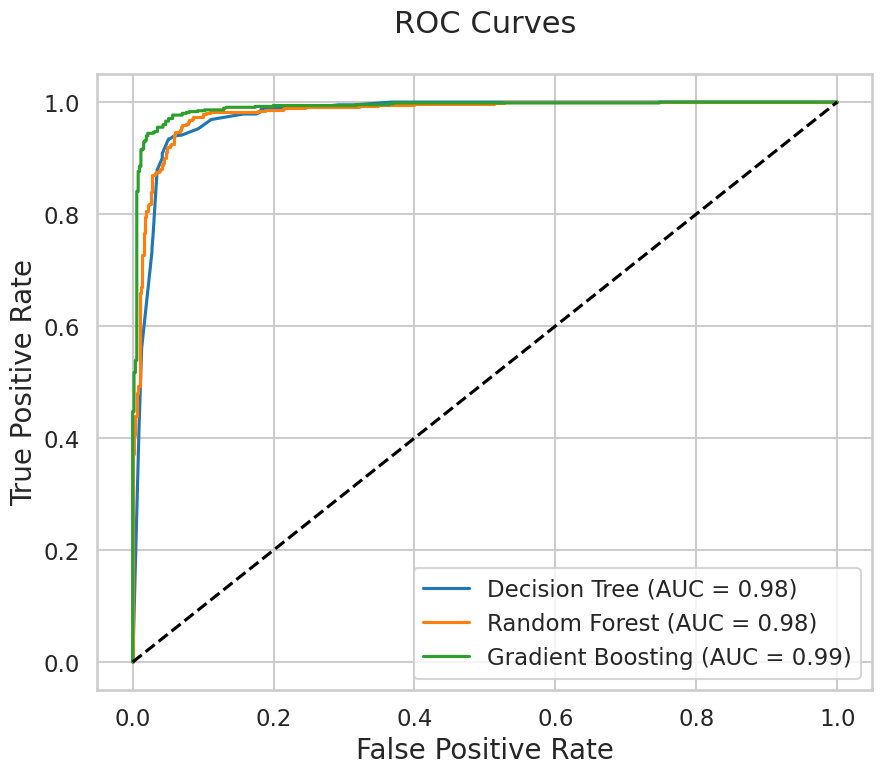

In [ ]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_gboost, tpr_gboost, label=f'Gradient Boosting (AUC = {auc_gboost:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pickle

# Save the trained Gradient Boosting model
with open('gb_model.pkl', 'wb') as f:
    pickle.dump(model_gb, f)

print("Model saved as gb_model.pkl using pickle")

Model saved as gb_model.pkl using pickle
